<a href="https://colab.research.google.com/github/grosa1/hands-on-ml-tutorials/blob/master/tutorial_2/Software_Defect_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2 - Software Defect Prediciton



> **About PROMISE Software Engineering Repository**
 
We will use one of the dataset from PROMISE, made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.


Example of file info:
```
Number of instances: 10885


Number of attributes: 22 (5 different lines of code measure, 
          3 McCabe metrics, 4 base Halstead measures, 8 derived 
           Halstead measures, a branch-count, and 1 goal field)


Attribute Information:
      1. loc             : numeric % McCabe's line count of code
      2. v(g)            : numeric % McCabe "cyclomatic complexity"
      3. ev(g)           : numeric % McCabe "essential complexity"
      4. iv(g)           : numeric % McCabe "design complexity"
      5. n               : numeric % Halstead total operators + operands
      6. v               : numeric % Halstead "volume"
      7. l               : numeric % Halstead "program length"
      8. d               : numeric % Halstead "difficulty"
      9. i               : numeric % Halstead "intelligence"
     10. e               : numeric % Halstead "effort"
     11. b               : numeric % Halstead 
     12. t               : numeric % Halstead's time estimator
     13. lOCode          : numeric % Halstead's line count
     14. lOComment       : numeric % Halstead's count of lines of comments
     15. lOBlank         : numeric % Halstead's count of blank lines
     16. lOCodeAndComment: numeric
     17. uniq_Op         : numeric % unique operators
     18. uniq_Opnd       : numeric % unique operands
     19. total_Op        : numeric % total operators
     20. total_Opnd      : numeric % total operands
     21: branchCount     : numeric % of the flow graph
     22. defects         : {false,true} % module has/has not one or more 
                                        % reported defects
```

>### Setup

In [65]:
from scipy.io import arff             # load arff in pandas
import numpy as np                    # linear algebra
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # data visualization
import seaborn as sns                 # statistical data visualization

> ### Load the dataset

In [66]:
!wget http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff
!wget http://promise.site.uottawa.ca/SERepository/datasets/jm1.arff
!wget http://promise.site.uottawa.ca/SERepository/datasets/kc1.arff

--2021-04-13 23:03:58--  http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff
Resolving promise.site.uottawa.ca (promise.site.uottawa.ca)... 137.122.24.222
Connecting to promise.site.uottawa.ca (promise.site.uottawa.ca)|137.122.24.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56758 (55K) [text/plain]
Saving to: ‘cm1.arff.2’

cm1.arff.2          100%[===================>]  55.43K   194KB/s    in 0.3s    

2021-04-13 23:03:59 (194 KB/s) - ‘cm1.arff.2’ saved [56758/56758]

--2021-04-13 23:03:59--  http://promise.site.uottawa.ca/SERepository/datasets/jm1.arff
Resolving promise.site.uottawa.ca (promise.site.uottawa.ca)... 137.122.24.222
Connecting to promise.site.uottawa.ca (promise.site.uottawa.ca)|137.122.24.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 861589 (841K) [text/plain]
Saving to: ‘jm1.arff.2’

jm1.arff.2          100%[===================>] 841.40K   629KB/s    in 1.3s    

2021-04-13 23:04:00 (629 KB/s) - ‘j

> ##### Convert `.arff` to `DataFrame`

In [67]:
dataset = arff.loadarff('jm1.arff')

In [68]:
print(dataset)

(array([( 1.1, 1.4, 1.4, 1.4,   1.3, 1.30000e+00, 1.3 ,  1.3 ,  1.3 , 1.300000e+00, 1.3 , 1.30000e+00,  2.,  2.,  2., 2.,  1.2,  1.2,   1.2,  1.2,  1.4, b'false'),
       ( 1. , 1. , 1. , 1. ,   1. , 1.00000e+00, 1.  ,  1.  ,  1.  , 1.000000e+00, 1.  , 1.00000e+00,  1.,  1.,  1., 1.,  1. ,  1. ,   1. ,  1. ,  1. , b'true'),
       (72. , 7. , 1. , 6. , 198. , 1.13413e+03, 0.05, 20.31, 55.85, 2.302910e+04, 0.38, 1.27939e+03, 51., 10.,  8., 1., 17. , 36. , 112. , 86. , 13. , b'true'),
       ...,
       (42. , 4. , 1. , 2. , 103. , 5.19570e+02, 0.04, 26.4 , 19.68, 1.371672e+04, 0.17, 7.62040e+02, 29.,  1., 10., 0., 18. , 15. ,  59. , 44. ,  7. , b'false'),
       (10. , 1. , 1. , 1. ,  36. , 1.47150e+02, 0.12,  8.44, 17.44, 1.241570e+03, 0.05, 6.89800e+01,  6.,  0.,  2., 0.,  9. ,  8. ,  21. , 15. ,  1. , b'false'),
       (19. , 3. , 1. , 1. ,  58. , 2.72630e+02, 0.09, 11.57, 23.56, 3.154670e+03, 0.09, 1.75260e+02, 13.,  0.,  2., 1., 12. , 14. ,  31. , 27. ,  5. , b'false')],
      dtyp

In [69]:
data = pd.DataFrame(dataset[0])
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'false'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'true'
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,b'true'
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,b'true'
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,b'true'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13.0,0.0,2.0,0.0,10.0,15.0,30.0,22.0,7.0,b'false'
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5.0,0.0,2.0,0.0,12.0,8.0,19.0,11.0,3.0,b'false'
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29.0,1.0,10.0,0.0,18.0,15.0,59.0,44.0,7.0,b'false'
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6.0,0.0,2.0,0.0,9.0,8.0,21.0,15.0,1.0,b'false'


> ##### We have to "fix" the values of `defects` column

In [70]:
data['defects'] = data['defects'].values.astype(str)
data['defects'] = data['defects'].map({'true': True, 'false': False})
data['defects']

0        False
1         True
2         True
3         True
4         True
         ...  
10880    False
10881    False
10882    False
10883    False
10884    False
Name: defects, Length: 10885, dtype: bool

> ### Data Discovery & Visualization

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  float64
 13  lOComment          10885 non-null  float64
 14  lOBlank            10885 non-null  float64
 15  locCodeAndComment  10885 non-null  float64
 16  uniq_Op            108

In [72]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,True


> ##### With `sample()` we can get a random sample of rows

In [73]:
data.sample(10) 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
8246,29.0,5.0,1.0,4.0,59.0,283.63,0.13,7.50,37.82,2127.25,0.09,118.18,22.0,0.0,5.0,0.0,10.0,18.0,32.0,27.0,9.0,False
9778,6.0,1.0,1.0,1.0,28.0,116.76,0.31,3.25,35.93,379.46,0.04,21.08,4.0,0.0,0.0,0.0,6.0,12.0,15.0,13.0,1.0,False
5747,35.0,6.0,1.0,3.0,84.0,423.73,0.06,15.83,26.76,6709.04,0.14,372.72,22.0,5.0,6.0,0.0,15.0,18.0,46.0,38.0,11.0,False
8924,23.0,2.0,1.0,2.0,58.0,272.63,0.11,8.80,30.98,2399.10,0.09,133.28,17.0,0.0,2.0,1.0,11.0,15.0,34.0,24.0,3.0,False
8861,15.0,13.0,13.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,False
1514,37.0,3.0,1.0,3.0,55.0,267.19,0.11,8.87,30.13,2369.08,0.09,131.62,22.0,7.0,4.0,1.0,14.0,15.0,36.0,19.0,4.0,True
3870,13.0,2.0,1.0,1.0,50.0,232.19,0.05,19.13,12.14,4440.69,0.08,246.70,8.0,0.0,3.0,0.0,17.0,8.0,32.0,18.0,3.0,False
1388,22.0,10.0,7.0,2.0,121.0,605.00,0.04,28.29,21.39,17112.86,0.20,950.71,19.0,0.0,1.0,0.0,19.0,14.0,84.0,44.0,19.0,True
9376,9.0,2.0,1.0,2.0,17.0,62.91,0.21,4.67,13.48,293.57,0.02,16.30,7.0,0.0,0.0,0.0,7.0,6.0,9.0,8.0,3.0,False
3323,60.0,8.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,False


> ##### Show the number of rows and columns:

In [74]:
data.shape

(10885, 22)

> ##### Show some simple statistics:

In [75]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


> ##### Class Distribution

In [76]:
 def perc(values):
    pct = float(values/data['defects'].count()) * 100
    return round(pct, 2)

d_false, d_true = data.groupby('defects').size() #defect rates (true/false)
print('False : ', d_false, '%', perc(d_false))
print('True : ', d_true, '%', perc(d_true))

False :  8779 % 80.65
True :  2106 % 19.35


> ##### Bar plot

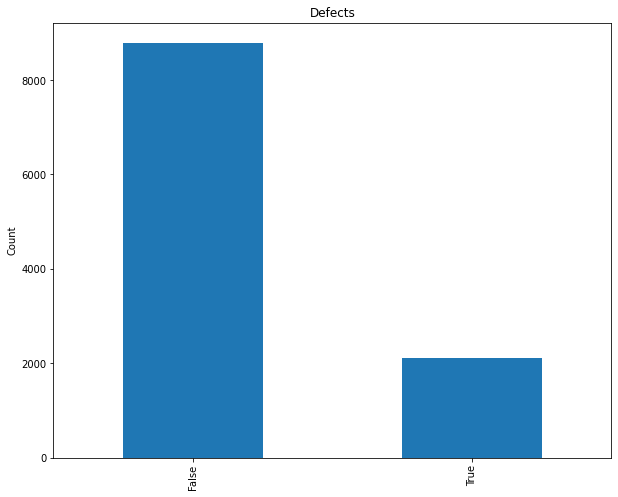

In [77]:
p_bar = data['defects'].value_counts().plot(kind='bar', title='Defects', figsize=(10,8));
p_bar.set_ylabel('Count');

> ##### Data Correlation

In [78]:
data.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,0.899965,0.750564,0.921918,0.612858,0.803573,0.278119,0.536681,0.764622,0.880967,0.868275,0.830194,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,0.759635,0.709501,0.799915,0.384506,0.538366,0.209811,0.647430,0.700514,0.744164,0.696078,0.971958,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,0.445693,0.315538,0.454604,0.294208,0.338243,0.190911,0.263000,0.337031,0.479935,0.435518,0.785553,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,0.743013,0.757702,0.775873,0.351583,0.541296,0.207028,0.500750,0.617966,0.715244,0.668940,0.858994,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,0.983938,0.716536,0.944383,0.596374,0.798561,0.284391,0.610412,0.836171,0.995689,0.989484,0.747894,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,0.999696,0.800000,0.962078,0.576844,0.792330,0.266537,0.606993,0.852296,0.981565,0.971960,0.759971,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,-0.196147,-0.062026,-0.218373,-0.165885,-0.223670,-0.106117,-0.305331,-0.234892,-0.237325,-0.241023,-0.279126,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,0.751835,0.574298,0.768188,0.502121,0.637211,0.253793,0.749305,0.639686,0.817546,0.777732,0.671976,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,0.598341,0.209268,0.563920,0.392551,0.572352,0.217810,0.391646,0.726696,0.620676,0.687891,0.325796,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,0.799868,1.000000,0.809070,0.384806,0.600649,0.148693,0.482061,0.586805,0.735802,0.673490,0.667886,0.086036


> ##### Correlation Heatmap

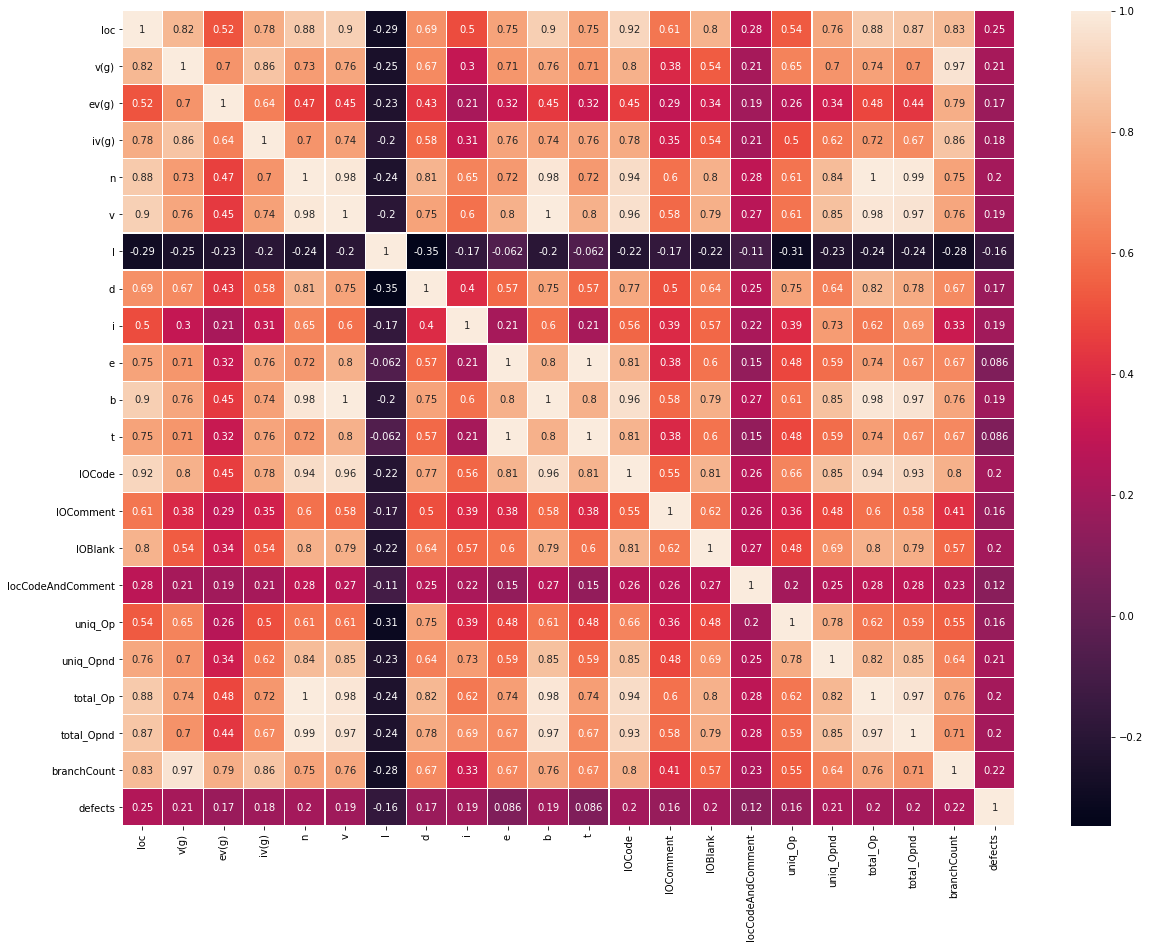

In [79]:
plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), linewidth=.2, annot=True)
plt.show()

> **N.B.**
* The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)
* The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)

> ##### Scatter Plot

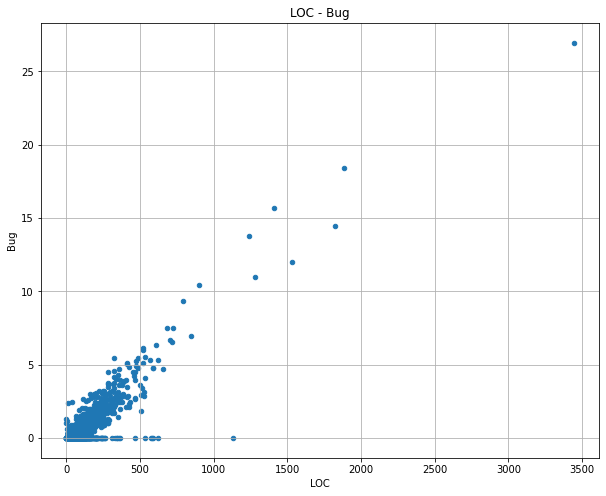

In [80]:
p_scatter = data.plot(kind='scatter', x='loc', y='b', title='LOC - Bug', figsize=(10,8), grid=True);
p_scatter.set_xlabel('LOC');
p_scatter.set_ylabel('Bug');

> ### Data Preprocessing

> ##### Count and remove `null` values

In [81]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [82]:
data.shape

(10885, 22)

In [83]:
data = data.dropna()
data.shape

(10880, 22)

> ##### Box Plot

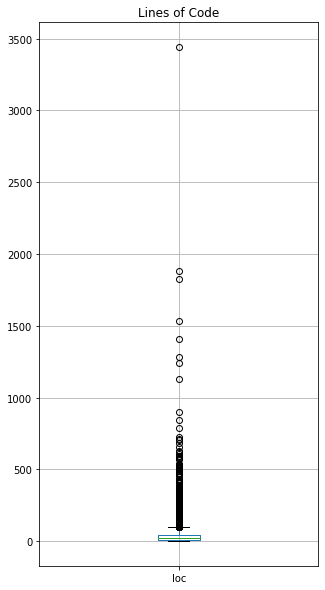

In [84]:
data['loc'].plot(kind="box", title='Lines of Code', figsize=(5,10), grid=True);

In [85]:
data['loc'].describe()

count    10880.000000
mean        42.020138
std         76.608641
min          1.000000
25%         11.000000
50%         23.000000
75%         46.000000
max       3442.000000
Name: loc, dtype: float64

> ### Preparing training set and test set

In [86]:
X = data.drop(['defects'], axis=1)
y = data['defects'].astype(int)

In [87]:
X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0


In [88]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: defects, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
x_train.shape, x_test.shape

((7616, 21), (3264, 21))

In [91]:
y_train.shape, y_test.shape

((7616,), (3264,))

### Prediction

In [92]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def print_metrics(y_test, y_pred):
    print('1. Accuracy: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
    print('2. Precision: {}'.format(round(precision_score(y_test, y_pred), 2)))
    print('3. Recall: {}'.format(round(recall_score(y_test, y_pred), 2)))
    print('4. F1 score: {}'.format(round(f1_score(y_test, y_pred), 2)))
    print('5. ROC AUC: {}'.format(round(roc_auc_score(y_test, y_pred), 2)))
    print('\n++ Confusion Matrix ++\n{}'.format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))

> ##### Data Normalization  (Min-Max Normalization)


In [93]:
# Let's create a preprocessor for data normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# For first, we will process train set
x_train_scaled = scaler.fit_transform(x_train)

# Then, we will do the same for test set
x_test_scaled = scaler.transform(x_test)

> ##### Applying SVM Classifier

In [94]:
# 1. Model trainig
model = SVC().fit(x_train_scaled, y_train)

# 2. Prediction
y_pred = model.predict(x_test_scaled)

In [95]:
# Let's print some metrics
print_metrics(y_test, y_pred)

1. Accuracy: 0.82
2. Precision: 0.69
3. Recall: 0.08
4. F1 score: 0.15
5. ROC AUC: 0.54

++ Confusion Matrix ++
Predicted     0   1
Actual             
0          2612  24
1           575  53


> ##### Dummy Classifier

In [96]:
# 1. Model trainig
model_const = DummyClassifier(strategy='constant', constant=0).fit(x_train_scaled, y_train)

# 2. Prediction
y_pred = model_const.predict(x_test_scaled)

# Let's print some metrics
print_metrics(y_test, y_pred)

1. Accuracy: 0.81
2. Precision: 0.0
3. Recall: 0.0
4. F1 score: 0.0
5. ROC AUC: 0.5

++ Confusion Matrix ++
Predicted     0
Actual         
0          2636
1           628


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
# 1. Model trainig
model_rand = DummyClassifier(strategy='uniform').fit(x_train_scaled, y_train)

# 2. Prediction
y_pred = model_rand.predict(x_test_scaled)

# Let's print some metrics
print_metrics(y_test, y_pred)

1. Accuracy: 0.5
2. Precision: 0.18
3. Recall: 0.46
4. F1 score: 0.26
5. ROC AUC: 0.49

++ Confusion Matrix ++
Predicted     0     1
Actual               
0          1336  1300
1           336   292


### Data Balancing

In [98]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


> ##### `RandomUnderSampler`: we will remove some osservation in the majority classes (under sampling) to archieve a 1: 1 ratio between defective and non-defective

In [99]:
# For train set only !!!
rus = RandomUnderSampler(sampling_strategy='majority') 
x_rus, y_rus = rus.fit_resample(x_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


> ##### `RandomOverSampler`: we will generate new samples in the minority classes (over sampling)

In [100]:
# For train set only !!!
ros = RandomOverSampler(sampling_strategy='minority') 
x_ros, y_ros = ros.fit_resample(x_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [101]:
print('Original :', x_train_scaled.shape)
print('Random Under Sampler :', x_rus.shape)
print('Random Over Sampler :', x_ros.shape)

Original : (7616, 21)
Random Under Sampler : (2950, 21)
Random Over Sampler : (12282, 21)


##### Applying SVM Classifier with RUS

In [102]:
# N.B. We already done data preprocessing
# Training
model = SVC().fit(x_rus, y_rus)

# Prediction
y_pred_svc_rus = model.predict(x_test_scaled)

In [103]:
# Let's print some metrics
print_metrics(y_test, y_pred_svc_rus)

1. Accuracy: 0.72
2. Precision: 0.36
3. Recall: 0.55
4. F1 score: 0.43
5. ROC AUC: 0.66

++ Confusion Matrix ++
Predicted     0    1
Actual              
0          2019  617
1           285  343


##### Applying SVM Classifier with ROS

In [104]:
# N.B. We already done data preprocessing
# Training
model = SVC().fit(x_ros, y_ros)

# Prediction
y_pred_svc = model.predict(x_test_scaled)

In [105]:
# Let's print some metrics
print_metrics(y_test, y_pred_svc)

1. Accuracy: 0.72
2. Precision: 0.36
3. Recall: 0.57
4. F1 score: 0.44
5. ROC AUC: 0.66

++ Confusion Matrix ++
Predicted     0    1
Actual              
0          1996  640
1           270  358


##### Applying RandomForest Classifier with ROS

In [106]:
# N.B. We already done data preprocessing
# Training
model = RandomForestClassifier().fit(x_ros, y_ros)

# Prediction
y_pred_rf = model.predict(x_test_scaled)

In [107]:
# Let's print some metrics
print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.8
2. Precision: 0.46
3. Recall: 0.34
4. F1 score: 0.39
5. ROC AUC: 0.62

++ Confusion Matrix ++
Predicted     0    1
Actual              
0          2382  254
1           414  214


##### Applying KNN Classifier with ROS

In [108]:
# N.B. We already done data preprocessing
# Training
model = KNeighborsClassifier(n_neighbors=200).fit(x_ros, y_ros)

# Prediction
y_pred_knn = model.predict(x_test_scaled)

In [109]:
# Let's print some metrics
print_metrics(y_test, y_pred_knn)

1. Accuracy: 0.67
2. Precision: 0.33
3. Recall: 0.65
4. F1 score: 0.44
5. ROC AUC: 0.67

++ Confusion Matrix ++
Predicted     0    1
Actual              
0          1787  849
1           217  411


### Compare results with ROC curve

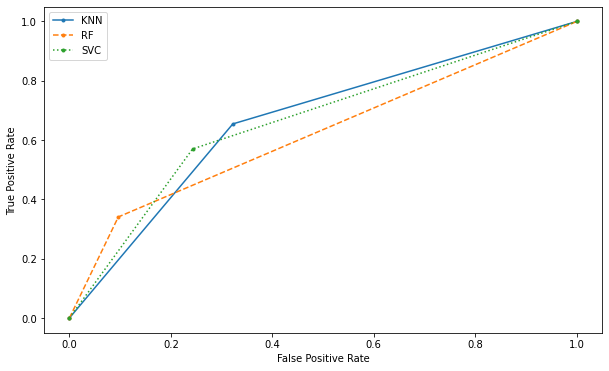

In [110]:
from sklearn.metrics import roc_curve

svc_fpr, svc_tpr, svc_th = roc_curve(y_test, y_pred_svc)
rf_fpr, rf_tpr, rf_th = roc_curve(y_test, y_pred_rf)
knn_fpr, knn_tpr, knn_th = roc_curve(y_test, y_pred_knn)

# plot the roc curve for the model
plt.figure(figsize=(10,6))
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(rf_fpr, rf_tpr, marker='.', linestyle='--', label='RF')
plt.plot(svc_fpr, svc_tpr, marker='.', linestyle=':', label='SVC')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

> ### References

- Scikit-learn tutorials: [link](https://scikit-learn.org/stable/tutorial/index.html)
- Scikit-learn examples: [link](https://scikit-learn.org/stable/auto_examples/index.html)
- Scikit-learn doc: [user guide](https://scikit-learn.org/stable/user_guide.html) and [api reference](https://scikit-learn.org/stable/modules/classes.html)
- PROMISE SE Repository: [link](http://promise.site.uottawa.ca/SERepository/datasets-page.html)